<a href="https://colab.research.google.com/github/giulscio/giulscio/blob/main/Homework_Analisi_Dati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#Regressione

Nel caso della regressione, vogliamo predire il valore della colonna "weight".

#Classificazione

Nel caso della classificazione, vogliamo predire una delle due classi:

- Obesità (Obesity_Type_I, Obesity_Type_II, Obesity_Type_III) --> 1
- Non obesità (tutto il resto) --> 0

<br>
<br>

#METRICHE
<br>
Regressione:

Per valutare i task di regressione, utilizzerò il Root Mean Squared Error. Il RMSE è dato da:

$\text{RMSE} =sqrt{\frac{1}{n} \sum_{i=1}^{n} (d_i - \hat{f}_i)^2}$

Dove:
- $ n $ è il numero di campioni di test.
- $ d_i $ rappresenta il valore vero del campione i-esimo.
- $\hat{f}_i$ rappresenta il valore predetto del campione i-esimo.

<br>
<br>

Classificazione:

Per valutare i task di classificazione, utilizzerò la metrica di accuratezza. L'accuratezza è data da:

 $\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$

Dove:

- TP (True Positives) è il numero di campioni positivi correttamente classificati.
- TN (True Negatives) è il numero di campioni negativi correttamente classificati.
- FP (False Positives) è il numero di campioni positivi classificati erroneamente.
- FN (False Negatives) è il numero di campioni negativi classificati erroneamente.




# MANIPOLAZIONE DATAFRAME

Il DataFrame è manipolato come segue:
- Vengono trasformati valori delle colonne in etichette numeriche. Per ogni colonna, viene creata una nuova colonna e i valori distinti sono sostituiti da un numero intero unico, processo noto come "label encoding".

- Viene aggiunta una nuova colonna chiamata 'Bias' all'inizio del DataFrame, riempiendola con il valore 1 per tutte le righe. Questo passo è utile nella tecnica di regressione lineare.

- Vengono mescolate le righe del DataFrame in modo casuale e resettati gli indici, garantendo un ordine casuale dei dati. Questa randomizzazione è cruciale inquanto aiuta a evitare bias e migliora la generalizzazione del modello, infatti, senza di essa il test set (estratto dalle ultime 100 righe) conterrebbe solo individui di genere femminile, influendo negativamente sulle prestazioni dei modelli.

In [ ]:

def add_labels(df, columns, new_names=None):

  if new_names is None:
    new_names = [col + '_l' for col in columns]

  for col, new_name in zip(columns, new_names):
    values = df[col].unique()
    labels = {v: i for i, v in enumerate(values)}
    df[new_name] = df[col].apply(lambda x: labels[x])
    df[new_name].astype(int)

  return df

columns=["Gender", "NObeyesdad", "CAEC", "CALC", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS"]
df_l = add_labels(df, columns)

# Add bias
df_l.insert(0, 'Bias', 1)

#randomizzazione
df_l=df_l.sample(frac=1).reset_index(drop=True)







# PREPARAZIONE DEL DATASET PER TASK DI CLASSIFICAZIONE

In [ ]:
from sklearn.preprocessing import StandardScaler
df_l_class = df_l[[col + '_l' for col in columns] + ['Weight', 'Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'TUE', 'NObeyesdad']]
df_l_class = df_l_class.drop(columns=['NObeyesdad_l'])

valori_obesita = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
colonna_da_modificare = 'NObeyesdad'
df_l_class[colonna_da_modificare] = df_l_class[colonna_da_modificare].isin(valori_obesita).astype(int)


df_l_class




,Gender_l,CAEC_l,CALC_l,family_history_with_overweight_l,FAVC_l,SMOKE_l,SCC_l,MTRANS_l,Weight,Age,Height,FCVC,NCP,CH2O,TUE,NObeyesdad
0,1,0,1,0,1,0,0,0,121.041720,23.881938,1.829971,2.684335,2.711238,2.732331,0.442456,1
1,1,0,2,0,1,0,0,0,79.828725,18.900253,1.750359,2.000000,2.228113,2.045004,0.961806,0
2,0,0,0,0,1,0,1,0,65.000000,16.093234,1.608914,1.321028,1.000000,2.000000,0.965604,0
3,1,0,1,0,1,0,0,2,123.721352,30.350516,1.860292,2.002784,3.000000,2.292906,0.000000,1
4,0,0,1,0,1,0,0,0,47.000000,26.000000,1.590000,2.000000,1.000000,2.000000,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,1,1,0,1,0,0,0,58.000000,18.000000,1.600000,2.000000,3.000000,2.000000,0.000000,0
2107,0,0,1,0,1,0,0,0,104.758713,25.967010,1.654875,3.000000,3.000000,2.612758,0.802136,1
2108,1,0,1,1,1,0,0,0,51.588874,17.038222,1.710564,2.000000,2.057935,2.371015,0.714627,0
2109,0,0,1,0,1,0,0,0,104.854928,25.993154,1.609401,3.000000,3.000000,2.613504,0.778632,1


# PREPARAZIONE DATASET PER TASK DI REGRESSIONE

In [ ]:
df_l =  df_l[['Bias']+[col + '_l' for col in columns] + ['Weight', 'Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'TUE']]

df_l

,Bias,Gender_l,NObeyesdad_l,CAEC_l,CALC_l,family_history_with_overweight_l,FAVC_l,SMOKE_l,SCC_l,MTRANS_l,Weight,Age,Height,FCVC,NCP,CH2O,TUE
0,1,1,5,0,1,0,1,0,0,0,121.041720,23.881938,1.829971,2.684335,2.711238,2.732331,0.442456
1,1,1,1,0,2,0,1,0,0,0,79.828725,18.900253,1.750359,2.000000,2.228113,2.045004,0.961806
2,1,0,1,0,0,0,1,0,1,0,65.000000,16.093234,1.608914,1.321028,1.000000,2.000000,0.965604
3,1,1,5,0,1,0,1,0,0,2,123.721352,30.350516,1.860292,2.002784,3.000000,2.292906,0.000000
4,1,0,0,0,1,0,1,0,0,0,47.000000,26.000000,1.590000,2.000000,1.000000,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,1,0,1,1,0,1,0,0,0,58.000000,18.000000,1.600000,2.000000,3.000000,2.000000,0.000000
2107,1,0,6,0,1,0,1,0,0,0,104.758713,25.967010,1.654875,3.000000,3.000000,2.612758,0.802136
2108,1,1,4,0,1,1,1,0,0,0,51.588874,17.038222,1.710564,2.000000,2.057935,2.371015,0.714627
2109,1,0,6,0,1,0,1,0,0,0,104.854928,25.993154,1.609401,3.000000,3.000000,2.613504,0.778632


# SUDDIVISIONE DEL DATASET IN TRAIN E TEST

- E' eseguita la suddivisione dei dati in un set di training e un set di test

- Vengono preparati i dati per l'addestramento e il test di modelli di classificazione e regressione utilizzando la libreria Pandas e NumPy in Python.

In [ ]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = df_l[:int(len(df_l) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = df_l[int(len(df_l) * TRAIN_TEST_SPLIT_PERCENTAGE):]
dataset_training_class = df_l_class[:int(len(df_l) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test_class = df_l_class[int(len(df_l) * TRAIN_TEST_SPLIT_PERCENTAGE):]

In [ ]:
y_train_class=dataset_training_class['NObeyesdad'].copy()
x_train_class=dataset_training_class.drop('NObeyesdad',axis=1).copy()
x_test_class=dataset_test_class.drop('NObeyesdad',axis=1).copy()
y_test_class=dataset_test_class['NObeyesdad'].copy()


xtest_class=x_test_class.to_numpy()
ytest_class=y_test_class.to_numpy()
xtrain_class=x_train_class.to_numpy()
ytrain_class=y_train_class.to_numpy()


In [ ]:

y_train=dataset_training['Weight'].copy()
x_train=dataset_training.drop('Weight',axis=1).copy()
x_test=dataset_test.drop('Weight',axis=1).copy()
y_test=dataset_test['Weight'].copy()

xt=x_test.to_numpy()
yt=y_test.to_numpy()
x=x_train.to_numpy()
y=y_train.to_numpy()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

# LINEAR REGRESSION (mine)

Come primo modello è implementata la Linear Regression con la formula chiusa vista a lezione.
Le funzioni implementate sono le seguenti:

- Linear Regression (linearreg)
- Funzione di predizione per Linear Regression (predizione)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# implemento la regressione lineare

def linearreg(x, y):
  c = np.linalg.inv(x.T @ x) @ x.T @ y
  # print(c)
  return(c)

def predizione(c, x):
  y= x @ c
  return (y)

par=linearreg(x,y)
y_learned=predizione(par, xt)

mse = mean_squared_error(yt, y_learned)
#print('mean squared error for linear regression: ', mse)
rmse_linear_regression=np.sqrt(mse)
print('root mean squared error for linear regression: ', rmse_linear_regression)
mae= mean_absolute_error(yt, y_learned)
print('mean absolute error for linear regression: ', mae)
#print(y_learned)


root mean squared error for linear regression:  15.108739972553511
mean absolute error for linear regression:  10.976192401780123


# LINEAR REGRESSION (SKlearn)

In [ ]:
from sklearn.linear_model import LinearRegression

modello=LinearRegression()
modello.fit(x,y)
p=modello.predict(xt)
msey= mean_squared_error(yt,p)
#print('mean squared error for linear regression: ', mse)
rmsey=np.sqrt(msey)
print('root mean squared error for linear regression SKLEARN: ', rmsey)
maey= mean_absolute_error(yt, p)
print('mean absolute error for linear regression SKLEARN : ', maey)


root mean squared error for linear regression SKLEARN:  15.108739972553439
mean absolute error for linear regression SKLEARN :  10.976192401781367


# LOGISTIC REGRESSION (MINE)

Come secondo modello, è realizzata la regressione logistica. Le funzioni implementate sono le seguenti:

- Funzione sigmoide (sigmoid): Calcola la funzione sigmoide, che trasforma un valore di input in una probabilità compresa tra 0 e 1.
- Funzione costo per la regressione logistica (logistic_regression_cost): Calcola il costo della regressione logistica, che misura quanto le predizioni del modello si discostano dai valori reali.
- Gradiente della funzione costo per la regressione logistica (logistic_regression_cost_gradient): Calcola il gradiente della funzione costo, che indica la direzione in cui si devono aggiornare i parametri per ridurre il costo.
- Discesa del gradiente per la regressione logistica (logistic_regression_gradient_descent): Esegue la discesa del gradiente per ottimizzare i parametri del modello, iterativamente aggiornando i parametri nella direzione opposta al gradiente per minimizzare il costo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    epsilon = 1e-5
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def logistic_regression_cost_gradient(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    grad = 1/m * np.dot(X.T, (predictions - y))
    return grad

def logistic_regression_gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        grad = logistic_regression_cost_gradient(X, y, theta)
        theta -= alpha * grad
        cost = logistic_regression_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history



#Scelta degli iperparametri

Per la logistic regression l'obiettivo è massimizzare l'accuratezza, poichè rappresenta un algoritmo di classificazione.

- iperparametri: learning rate (alpha) determina la velocità con cui i parametri del modello vengono aggiornati durante la discesa del gradiente.

<br>
<br>

Nel codice che segue seleziono l'iperparametro confrontando come il costo cambia per diversi valori di esso:

Un learning rate troppo alto potrebbe causare oscillazioni o divergenza del costo, mentre un learning rate troppo basso potrebbe portare a una convergenza molto lenta.

Anche se il costo e l'accuratezza sono metriche diverse, esiste un legame indiretto tra loro:

Un costo più basso generalmente indica che il modello sta facendo previsioni più vicine ai valori reali, il che può portare a un miglioramento dell'accuratezza. Questo non è sempre vero considerando la presenza di  overfitting o underfitting, ma, monitorando il costo, possiamo identificare questi problemi e risolverli e di conseguenza ottenere un miglioramento dell'accuratezza del modello.

Test con alpha = 1e-05


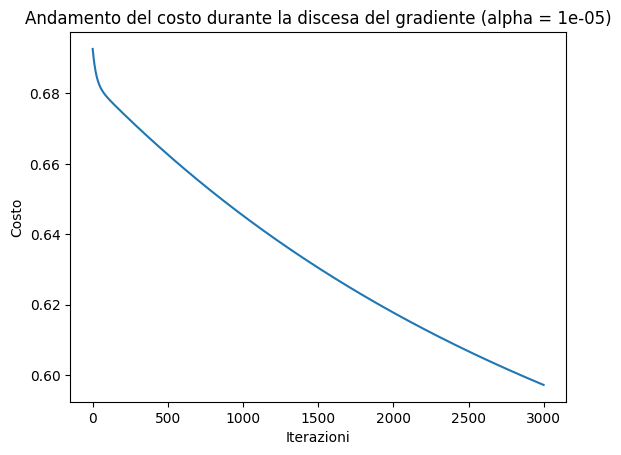

Model accuracy:  0.6933962264150944 

Test con alpha = 0.0001


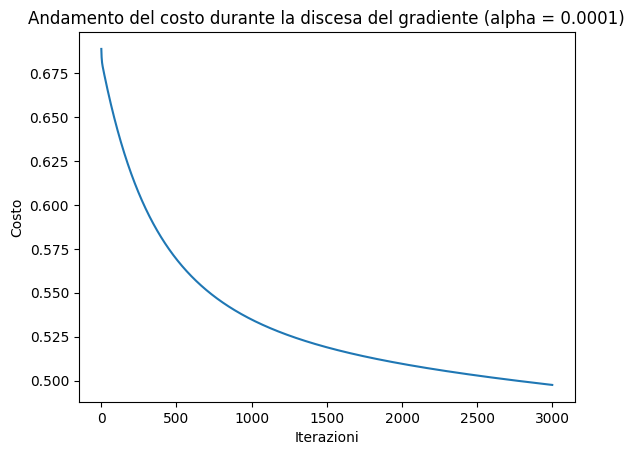

Model accuracy:  0.7783018867924528 

Test con alpha = 0.001


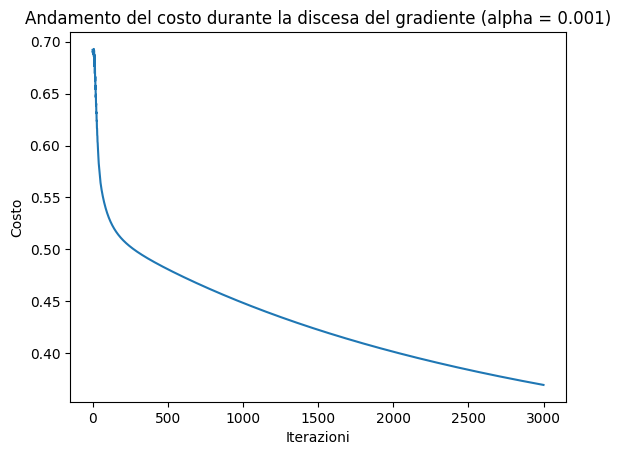

Model accuracy:  0.8537735849056604 

Test con alpha = 0.0015


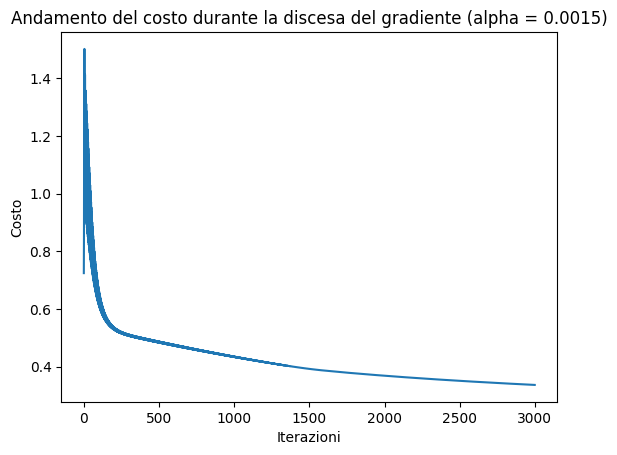

Model accuracy:  0.8584905660377359 

Test con alpha = 0.002


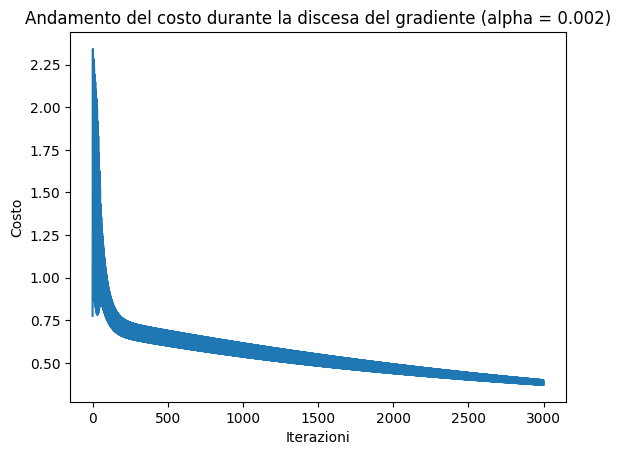

Model accuracy:  0.8301886792452831 

Test con alpha = 0.01


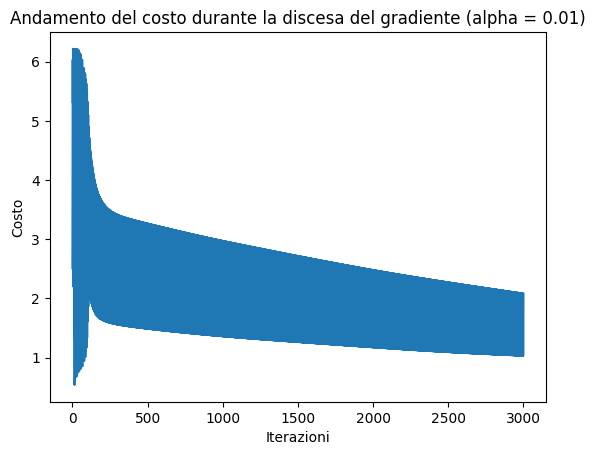

Model accuracy:  0.7264150943396226 

Scelto per classificazione logistic regression con alpha=  0.0015


In [ ]:
theta = np.zeros(xtest_class.shape[1])
alphas = [0.00001, 0.0001, 0.001, 0.0015, 0.002, 0.01,]
iterations = 3000
alphadef=0
max_accuracy=0

for alpha in alphas:
    print(f"Test con alpha = {alpha}")
    theta = np.zeros(xtrain_class.shape[1])
    theta, cost_history = logistic_regression_gradient_descent(xtrain_class, np.array(ytrain_class), theta, alpha, iterations)
    predictions = sigmoid(np.dot(xtest_class, theta))
    predicted_labels = (predictions > 0.5).astype(int)

    accuracy = (predicted_labels == ytest_class).mean()


    plt.plot(cost_history)
    plt.xlabel('Iterazioni')
    plt.ylabel('Costo')
    plt.title(f'Andamento del costo durante la discesa del gradiente (alpha = {alpha})')
    plt.show()
    print("Model accuracy: ", accuracy, "\n")
    if accuracy>=max_accuracy:
      max_accuracy=accuracy
      alphadef=alpha
print('Scelto per classificazione logistic regression con alpha= ',alphadef)


#considerazioni
- alpha = 0.0001 e alpha = 0.00001: la convergenza del costo è molto lenta, il valore del tasso di apprendimento è troppo basso
- alpha = 0.01 e alpha = 0.002: sono presenti oscillazioni nella discesa del gradiente, il tasso di apprendimento è troppo alto. (gli aggiornamenti dei parametri sono troppo grandi)

In [ ]:
from sklearn.metrics import confusion_matrix

theta = np.zeros(xtrain_class.shape[1])
theta, cost = logistic_regression_gradient_descent(
    xtrain_class, np.array(ytrain_class), theta, alphadef, iterations=10000
)

predictions = sigmoid(np.dot(xtest_class, theta))
predicted_labels = (predictions > 0.5).astype(int)

# Calculate accuracy
acc_log_reg = (predicted_labels == ytest_class).mean()
print("Model accuracy: ",acc_log_reg, "\n")

conf_matrix = confusion_matrix(ytest_class, predicted_labels)
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Falsi positivi:", FP)
print("Falsi negativi:", FN)




Model accuracy:  0.8820754716981132 

Falsi positivi: 11
Falsi negativi: 14


# Logistic regression (SKlearn)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=10000)
model.fit(xtrain_class, ytrain_class)

y_pred = model.predict(xtest_class)
accuracy = accuracy_score(ytest_class, y_pred)
print("Model accuracy (SKlearn):", accuracy, "\n")
conf_matrix = confusion_matrix(ytest_class, y_pred)
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Falsi positivi:", FP)
print("Falsi negativi:", FN)

Model accuracy (SKlearn): 0.9528301886792453 

Falsi positivi: 5
Falsi negativi: 5


# k nearest neighbour (mine)
Come terzo modello, è implementato KNN. Le funzioni sviluppate sono le seguenti:

- Funzione per predire i valori KNN_predict: utilizza l'algoritmo KNN per fare previsioni sui dati.
- KNN_majority_value: determina il valore di classificazione basato sul valore maggiormente presente per i K vicini.
- Funzione per calcolare i K vicini più prossimi KNN: calcola le distanze euclidee tra i campioni di training e un campione di test, e restituisce gli indici dei K vicini più prossimi.

In [ ]:
from scipy.spatial.distance import cdist

def KNN_predict(k,xtest,xtrain,ytrain):
  y_pred=np.empty(xtest.shape[0])
  for index in range(xtest.shape[0]):
    #calcolo i KNN
    knn=KNN(k,xtrain,xtest[index,:])
    y_pred[index]=(KNN_majority_value(k,ytrain,knn))
  return y_pred

def KNN_majority_value(k,res,knn):
  ret=0
  for i in range(k):
    ret+=res[knn[i,0]]

  if ret>(k/2):
    return 1
  return 0

def KNN(k, df, sample):
    distances = cdist(df, sample.reshape(1,-1), metric='euclidean')
    indices = np.argsort(distances, axis=0)
    return indices[:k]


# Scelta iperparametro

Anche per KNN l'obiettivo è massimizzare l'accuratezza poichè è un algoritmo di classificazione.

iperparametri: K (numero di vicini selezionato.)

Viene scelto il K a cui è associato il valore di accuratezza più alto.

In [ ]:
k_class=0
k_values=[1,3,5,7,9,11, 13, 17,35, 55, 101, 103,413,923, 1399]

max_acc=0
min_loss=None
for k in k_values:
  #calcolo dell'accuratezza per il valore di k corrente
  y_pred=KNN_predict(k,xtest_class,xtrain_class,ytrain_class)
  acc = accuracy_score(ytest_class, y_pred)
  print('KNN accuracy: ', acc ,"  ",k)

  if acc>=max_acc:
    max_acc=acc
    k_class=k

print('Scelto per classificazione KNN con K= ',k_class)



KNN accuracy:  0.9716981132075472    1
KNN accuracy:  0.9716981132075472    3
KNN accuracy:  0.9622641509433962    5
KNN accuracy:  0.9622641509433962    7
KNN accuracy:  0.9433962264150944    9
KNN accuracy:  0.9433962264150944    11
KNN accuracy:  0.9433962264150944    13
KNN accuracy:  0.9433962264150944    17
KNN accuracy:  0.9056603773584906    35
KNN accuracy:  0.9009433962264151    55
KNN accuracy:  0.8773584905660378    101
KNN accuracy:  0.8773584905660378    103
KNN accuracy:  0.8726415094339622    413
KNN accuracy:  0.8820754716981132    923
KNN accuracy:  0.8773584905660378    1399
Scelto per classificazione KNN con K=  3


In [ ]:

y_stim=KNN_predict(k_class,xtest_class,xtrain_class,ytrain_class)
acc_knn = accuracy_score(ytest_class, y_stim)
print('Accuratezza del modello: ', acc_knn)

conf_matrix = confusion_matrix(ytest_class,  y_stim)
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Falsi positivi:", FP)
print("Falsi negativi:", FN)

Accuratezza del modello:  0.9716981132075472
Falsi positivi: 3
Falsi negativi: 3


# k nearest neighbout (SKlearn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=k_class)
knn_classifier.fit(xtrain_class, ytrain_class)

y_pred = knn_classifier.predict(xtest_class)

accuracy = accuracy_score(ytest_class, y_pred)
print("Accuratezza del modello (SKlearn):", accuracy, "\n")
conf_matrix = confusion_matrix(ytest_class,  y_pred)
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Falsi positivi:", FP)
print("Falsi negativi:", FN)


Accuratezza del modello (SKlearn): 0.9716981132075472 

Falsi positivi: 3
Falsi negativi: 3


# DECISION TREES

Il quarto modello implementato è l'albero decisionale. Le funzioni sviluppate sono le seguenti:

 - fit: Costruisce l'albero decisionale utilizzando i dati di input X e le etichette y. Imposta la radice dell'albero e avvia la generazione dell'albero ricorsivamente.

- genera_albero: Costruisce l'albero decisionale ricorsivamente. Genera i nodi interni utilizzando i migliori split calcolati dalle funzioni ausiliarie. Alla profondità massima o se i valori nel nodo sono tutti uguali, crea nodi foglia.

- bestsplit: Per ogni feature, valuta tutte le possibili threshold e calcola l'information gain che deriva dalla divisione dei dati. Seleziona le feature e threshold che offrono il massimo information gain.

- information_gain: Calcola l'information gain risultante dalla divisione dei dati su una determinata threshold. Utilizza l'entropia per misurare l'eterogeneità delle etichette prima e dopo la divisione e mira a una riduzione di questa tramite una buona divisione dei dati. (quando l'entropia viene ridotta l'information gain è maggiore)

- split: Divide i dati in due insiemi in base a una soglia threshold, e restituisce gli indici dei campioni che soddisfano o meno la condizione della soglia.

- entropia: Calcola l'entropia delle etichette y.

- label_piu_comune: Determina l'etichetta più comune tra un insieme di etichette y.

- predict: Attraversa l'albero partendo dalla radice fino ai nodi foglia per ogni campione e predice le etichette per i dati di input X.

- attraversa_tree: Funzione ausiliaria per attraversare l'albero decisionale. Restituisce il valore del nodo foglia raggiunto per un singolo campione di input.



In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, right=None, left=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, minsplits=2, maxprofondita=100, numfeatures=None):
        self.minsplits = minsplits
        self.maxprofondita = maxprofondita
        self.numfeatures = numfeatures
        self.root = None

    def fit(self, X, y):
        self.numfeatures = X.shape[1] if self.numfeatures is None else min(X.shape[1], self.numfeatures)
        self.root = self.genera_albero(X, y)

    def genera_albero(self, X, y, profondita=0):
        numsamples, numfeatures = X.shape
        numlabels = len(np.unique(y))

        if numsamples == 0 or len(y) == 0:
            print("Avviso: Nessun campione o etichetta nei dati!")
            return None  # Oppure crea un nodo foglia con un valore di default

        # Stampa di debug

        if (profondita >= self.maxprofondita or numlabels == 1 or numsamples < self.minsplits):
            leaf_value = self.label_piu_comune(y)

            return Node(value=leaf_value)

        features = np.random.choice(numfeatures, self.numfeatures, replace=False)
        best_threshold, best_feature = self.bestsplit(X, y, features)

        if best_feature is None:
            leaf_value = self.label_piu_comune(y)
            return Node(value=leaf_value)

        left_index, right_index = self.split(X[:, best_feature], best_threshold)
        if len(left_index) == 0 or len(right_index) == 0:
            leaf_value = self.label_piu_comune(y)
            return Node(value=leaf_value)

        left = self.genera_albero(X[left_index, :], y[left_index], profondita + 1)
        right = self.genera_albero(X[right_index, :], y[right_index], profondita + 1)
        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right)

    def bestsplit(self, X, y, featuresindex):
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in featuresindex:
            colonna_X = X[:, feature]
            thresholds = np.unique(colonna_X)

            for threshold in thresholds:
                gain = self.information_gain(y, colonna_X, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_threshold, best_feature

    def information_gain(self, y, X, thr):
        # Calcolo entropia del genitore
        entropia_genitore = self.entropia(y)

        # Divisione dei dati
        left_index, right_index = self.split(X, thr)
        if len(left_index) == 0 or len(right_index) == 0:
            return 0

        # Calcolo entropia pesata dei figli
        n = len(y)
        n_l, n_r = len(left_index), len(right_index)
        entropia_left = self.entropia(y[left_index])
        entropia_right = self.entropia(y[right_index])
        entropia_figlio = (n_l / n) * entropia_left + (n_r / n) * entropia_right

        # Calcolo information gain
        information_gain = entropia_genitore - entropia_figlio
        return information_gain

    def split(self, x, thr):
        left_index = np.argwhere(x <= thr).flatten()
        right_index = np.argwhere(x > thr).flatten()
        return left_index, right_index

    def entropia(self, y):
        histogram = np.bincount(y)
        ps = histogram / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def label_piu_comune(self, y):
        if len(y) == 0:
            print("Avviso: 'y' è vuoto!")
            return None  # O qualche valore di default appropriato per il tuo caso d'uso
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self.attraversa_tree(x, self.root) for x in X])

    def attraversa_tree(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature] <= node.threshold:
            return self.attraversa_tree(x, node.left)
        return self.attraversa_tree(x, node.right)


# Scelta iperparametro

Per gli alberi decisionali, l'iperparametro principale è la profondità massima dell'albero. L'obiettivo è trovare la profondità ottimale in modo da massimizzare l'accuratezza del modello senza incorrere in un eccessivo overfitting, ovvero il perfetto apprendimento dei samples del train set senza una buona generalizzazione delle informazioni su samples mai visti.


Nell'algoritmo viene incrementata progressivamente la profondità fino a quando l'accuratezza del modello non diminuisce; in tal caso ulteriori complessità dell'albero non poterebbero a un miglioramento delle prestazioni ma condurrebbero a un loro peggioramento a causa dell'overfitting; motivo per il quale il valore ideale dell'iperparametro è quello immediatamente precedente alla prima diminuzione dell'accuratezza.

In [ ]:
mp = 0
max_acc = 0
best_depth = 0

while mp < 30:
    t = DecisionTree(maxprofondita=mp)
    t.fit(xtrain_class, ytrain_class)
    ypred = t.predict(xtest_class)
    acc = accuracy_score(ytest_class, ypred)
    print("Accuratezza del modello :", acc, "  profondità: ", mp, "\n")

    if acc >= max_acc:
        max_acc = acc
        best_depth = mp
        mp += 1
    else:
        break

print('Scelto per classificazione decision tree con max profondità= ', best_depth)


Accuratezza del modello : 0.5377358490566038   profondità:  0 

Accuratezza del modello : 0.8679245283018868   profondità:  1 

Accuratezza del modello : 0.8679245283018868   profondità:  2 

Accuratezza del modello : 0.9528301886792453   profondità:  3 

Accuratezza del modello : 0.9339622641509434   profondità:  4 

Scelto per classificazione decision tree con max profondità=  3


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix


# Inizializza e addestra l'albero
t = DecisionTree(mp)
t.fit(xtrain_class, ytrain_class)

# Prevedi sui dati di test
ypred = t.predict(xtest_class)

# Calcola l'accuratezza
acc_dt = accuracy_score(ytest_class, ypred)
print("Accuratezza del modello:", acc_dt, "\n")

# Matrice di confusione
conf_matrix = confusion_matrix(ytest_class, ypred)

# Calcola FP e FN
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Falsi positivi:", FP)
print("Falsi negativi:", FN)



Accuratezza del modello: 0.9811320754716981 

Falsi positivi: 0
Falsi negativi: 4


# ALBERI DI DECISIONE (SKlearnn)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(max_depth=mp)
t.fit(xtrain_class, ytrain_class)
ypred = t.predict(xtest_class)
acc = accuracy_score(ytest_class, ypred)
print("Accuratezza del modello :", acc)
# Matrice di confusione
conf_matrix = confusion_matrix(ytest_class, ypred)

# Calcola FP e FN
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Falsi positivi:", FP)
print("Falsi negativi:", FN)


Accuratezza del modello : 0.9669811320754716
Falsi positivi: 5
Falsi negativi: 2


#NEURAL NETWORK

L'ultimo modello implementato è una rete neurale. Le funzioni sviluppate sono le seguenti:

**Layer**:
   - ReLU e derivata: Funzioni di attivazione ReLU e la sua derivata.
   - LINEAR e derivata: Funzioni di attivazione lineare e la sua derivata.
   - DELTA_THRESHOLD: Soglia per il gradient clipping.

   - __init__: Inizializza i pesi e i bias del layer utilizzando la tecnica di He-et-al, imposta ReLU come funzione di attivazione predefinita e definisce il tasso di apprendimento (alpha).
   - forward: Calcola l'output del layer applicando la funzione di attivazione ai valori lineari z ottenuti dalla moltiplicazione dei pesi con l'input aggiungendo i bias.
   - backprop: Calcola l'errore del layer e fa back-propagation. Aggiorna i pesi e i bias utilizzando il tasso di apprendimento. Utilizza il gradient clipping per evitare l'exploding gradient.
   - gradient_clipping: Limita i valori dei gradienti al fine di prevenire il gradient exploding.

   <br>

**NeuralNetwork**:
   - __init__ Inizializza la rete neurale con dimensioni specificate per input, output e valori di default per numero di epoche e dimensione del batch. Crea i layer e imposta la funzione di attivazione lineare per l'ultimo strato.
   - fit: Addestra la rete neurale sui dati di training. Seleziona batch casuali e esegue la propagazione in avanti e all'indietro per ogni coppia di dati nel batch.
   - **predict**: Esegue la propagazione in avanti per calcolare l'output della rete per un dato input.

<br>
<br>

   - evaluateRegression: Calcola l'RMSE dei valori predetti dalla rete neurale rispetto ai valori target.

In [ ]:
class Layer:
    #Funzione di attivazione ReLU e derivata
    ReLU = lambda x :  np.maximum(0, x)
    DE_ReLU = lambda x :  x > 0
    #Valore lineare senza trasformazioni e derivata
    LINEAR = lambda x: x
    DE_LINEAR = lambda x: 1
    #Threshold per il gradient clipping
    DELTA_THRESHOLD = 5

    def __init__(self, input_size, output_size, ALPHA=.1):
        #Inizializzazione tramite la tecnica di He-et-al della matrice dei pesi
        self.W = np.random.randn(input_size, output_size) * np.sqrt(2 / output_size)
        #Inizializzazione della matrice dei bias
        self.bias = np.random.randn(1, output_size) * np.sqrt(2 / output_size)
        #Imposto ReLU come funzione di attivazione
        self.SIGMA =  Layer.ReLU
        self.DE_SIGMA = Layer.DE_ReLU
        #Input e z serviranno durante la propagation per memorizzare input e output
        self.input = None
        self.z = None
        #Learning rate del layer
        self.ALPHA = ALPHA

    # rappresenta il neurone
    def forward(self, a):
        self.input = a
        self.z = a.dot(self.W) + self.bias
        return self.SIGMA(self.z)

    def backprop(self, output_error):
        output_error = self.DE_SIGMA(self.z) * output_error #Calcola l'errore del layer
        delta = output_error @ self.W.T #Calcola il delta per il livello successivo
        delta = Layer.gradient_clipping(delta) #Aggiusta il delta per evitare il gradient exploding

        dW = self.input.T.dot(output_error)
        dB = output_error

        self.W -= self.ALPHA * dW  #Aggiorna i pesi
        self.bias -= self.ALPHA * dB #Aggiorna il bias
        return delta

    #Metodo per evitare il gradient exploding
    @staticmethod
    def gradient_clipping(delta):
        zero_mask = delta == 0
        valid_mask = abs(delta) < Layer.DELTA_THRESHOLD
        corrected_delta = np.where(valid_mask, delta, np.where(zero_mask, 0, np.sign(delta) * Layer.DELTA_THRESHOLD))
        return corrected_delta




class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, learning_rate, output_size=1,  epochs=150, batch_size=800):
        #Dimensioni di input, hidden layers e output
        l = [input_size] + hidden_layers + [output_size]
        #Creazione dei layers
        self.layers = [Layer(l[i], l[i+1], ALPHA=learning_rate) for i in range(len(l)-1)]
        #Ultimo strato ha funzione di attivazione lineare
        self.layers[-1].SIGMA = Layer.LINEAR
        self.layers[-1].DE_SIGMA = Layer.DE_LINEAR
        self.EPOCH = epochs
        self.BATCH = batch_size


    def fit(self, training_set, target_set):
        err = 1
        epoch=0


        while (epoch < self.EPOCH and err > 0.001):
            #Viene creato un batch casuale selezionando indici casuali dal training set
            batch = np.random.choice(len(training_set), size=self.BATCH, replace=False)
            X = training_set[batch]
            Y = target_set[batch]
            err=0
            #Viene eseguito un ciclo per ogni coppia di x e y nel batch
            for (x,y) in zip(X,Y):
                x = x.reshape(1,x.size)
                h = self.predict(x)
                # print(x, y, h)
                err += np.sqrt((y-h)**2)
                delta = (h-y)

                #Viene eseguita la retropropagazione dell'errore attraverso gli strati della rete
                for layer in self.layers[::-1]:
                    delta = layer.backprop(delta)
            epoch+=1

            #Se l'epoca corrente è un multiplo del 10% del numero massimo di epoche
            #viene calcolato l'errore medio dividendo err per la dimensione del batch
            if (epoch+1) % (self.EPOCH / 10) == 0:
                err /= self.BATCH
                #print("Epoch: " + str(epoch+1) + ", Error rate: " + str(err))
        #print("Epoch: " + str(epoch+1) + ", Error rate: " + str(err))

    def predict(self, x):
        output = x
        for layer in self.layers:
            output = layer.forward(output)

        return output

def evaluateRegression(nn, data, target):
    sq_error = 0
    for (x,y) in zip(data, target):
        p = nn.predict(x)[0][0]
        sq_error += (y - p)**2
    return np.sqrt(sq_error/len(data))

# SCELTA DEGLI IPERPARAMETRI

Poichè la rete neurale è utilizzata per un task di regressione l'obiettivo è minimizzare l'RMSE.

iperparametri:
- learning rate
- numero hidden layers
- numero di neuroni per hidden layer

Viene eseguita la ricerca del miglior valore per il tasso di apprendimento e per il numero di neuroni in un hidden layer, al fine di minimizzare l'RMSE.

 (Il numero di hidden layers è lasciato fisso ad 1 ma con la possibilità di aumentarlo: ad esempio nell'inizializzazione della rete neurale scrivere hiddenn_layers[20,20,30] indica che la rete neurale sarà formata da 3 hidden layer rispettivamente con 20 neuroni, 20 neuroni e 30 neuroni)

In [ ]:
best_lr = 0
min_rmse = 0
best_n_neuroni = 0

lr_values_nn = []
rmse_values_nn = []
n=[5, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for i in [ 0.001, 0.0001, 0.00001]:
  for j in n:
    lear = i
    nn = NeuralNetwork(x[0].shape[0], hidden_layers=[j], learning_rate=lear)
    nn.fit(x, y)
    rmse_NN = evaluateRegression(nn, xt, yt)

    lr_values_nn.append(lear)
    rmse_values_nn.append(rmse_NN)
    if (min_rmse==0 or min_rmse>rmse_NN):
      best_lr=i
      min_rmse=rmse_NN
      best_n_neuroni=j
    print("\nNeural Network con Learning Rate: ", lear, " e ", j, " neuroni per hidden layer", "RMSE: ", rmse_NN)
    j=j+1
  j=1
  print("\n\n")


print("\n scelto per le Neural Network Learning Rate: ", best_lr, " e ", best_n_neuroni, " neuroni per hidden layer", "RMSE: ", min_rmse)



Neural Network con Learning Rate:  0.001  e  5  neuroni per hidden layer RMSE:  16.222330578493388

Neural Network con Learning Rate:  0.001  e  20  neuroni per hidden layer RMSE:  15.621399456115803

Neural Network con Learning Rate:  0.001  e  30  neuroni per hidden layer RMSE:  15.631021358504853

Neural Network con Learning Rate:  0.001  e  40  neuroni per hidden layer RMSE:  14.23957671256384

Neural Network con Learning Rate:  0.001  e  50  neuroni per hidden layer RMSE:  14.461734661810736

Neural Network con Learning Rate:  0.001  e  60  neuroni per hidden layer RMSE:  22.113638406276763

Neural Network con Learning Rate:  0.001  e  70  neuroni per hidden layer RMSE:  18.546809742462926

Neural Network con Learning Rate:  0.001  e  80  neuroni per hidden layer RMSE:  24.522178167065306

Neural Network con Learning Rate:  0.001  e  90  neuroni per hidden layer RMSE:  17.30547383895031

Neural Network con Learning Rate:  0.001  e  100  neuroni per hidden layer RMSE:  14.01491916

# considerazioni

Un'analisi dei risultati ottenuti mostra che l'RMSE è abbastanza variabile, indipendentemente dal numero di neuroni e dal valore del learning rate. Tuttavia, questa variabilità aumenta significativamente con l'aggiunta di strati nascosti, suggerendo potenzialmente un problema di overfitting.

Attraverso una ricerca più approfondita dei valori degli iperparametri, che considera anche la loro correlazione con il numero di epoche,la rete potrebbe ottenere risultati migliori con un ampio margine e l'identificazione di una combinazione ottimale, inoltre, permetterebbe alla rete neurale di migliorare ulteriormente le sue prestazioni di regressione.

 Una valutazione degli iperparametri relativamente semplice, come quella eseguita, conduce anch'essa a ottimi risultati e spesso a risultati superiori rispetto a quelli ottenuti con la regressione lineare.

- Risultati migliori si riscontrano con valori bassi per il tasso di apprendimento, indipendentemente dal valore del numero di epoche, con decisiva prevalenza del valore 0.0001.
- Per quanto riguarda il numero di neuroni ottimale si osserva una variazione, con una leggera tendenza alla scleta di valori nè troppo alti nè troppo bassi.
- Si osserva in generale che all'aumentare del numero di epoche l'RMSE tende a diminuire, specialmente per valori di tasso di apprendimento basso.

# ANALISI CRITICA E CONFRONTO DEI MODELLI
#Regressione

Confrontiamo le prestazioni dei modelli di regressione, utilizzando come metrica il Root Mean Squared Error.

La rete neurale, a causa della sua alta complessità computazionale, richiede notevolmente più tempo sia per l'addestramento che per la previsione rispetto alla regressione lineare.

La rete neurale conduce spesso a risultati migliori, anche se non sempre con una significativa diminuzione dell'RMSE, pertanto questi non appaiono sufficientemente vantaggiosi da giustificare il tempo computazionale aggiuntivo richiesto.

I risultati della regressione lineare essendo generalmente molto buoni posonno essere considerati soddisfacenti.

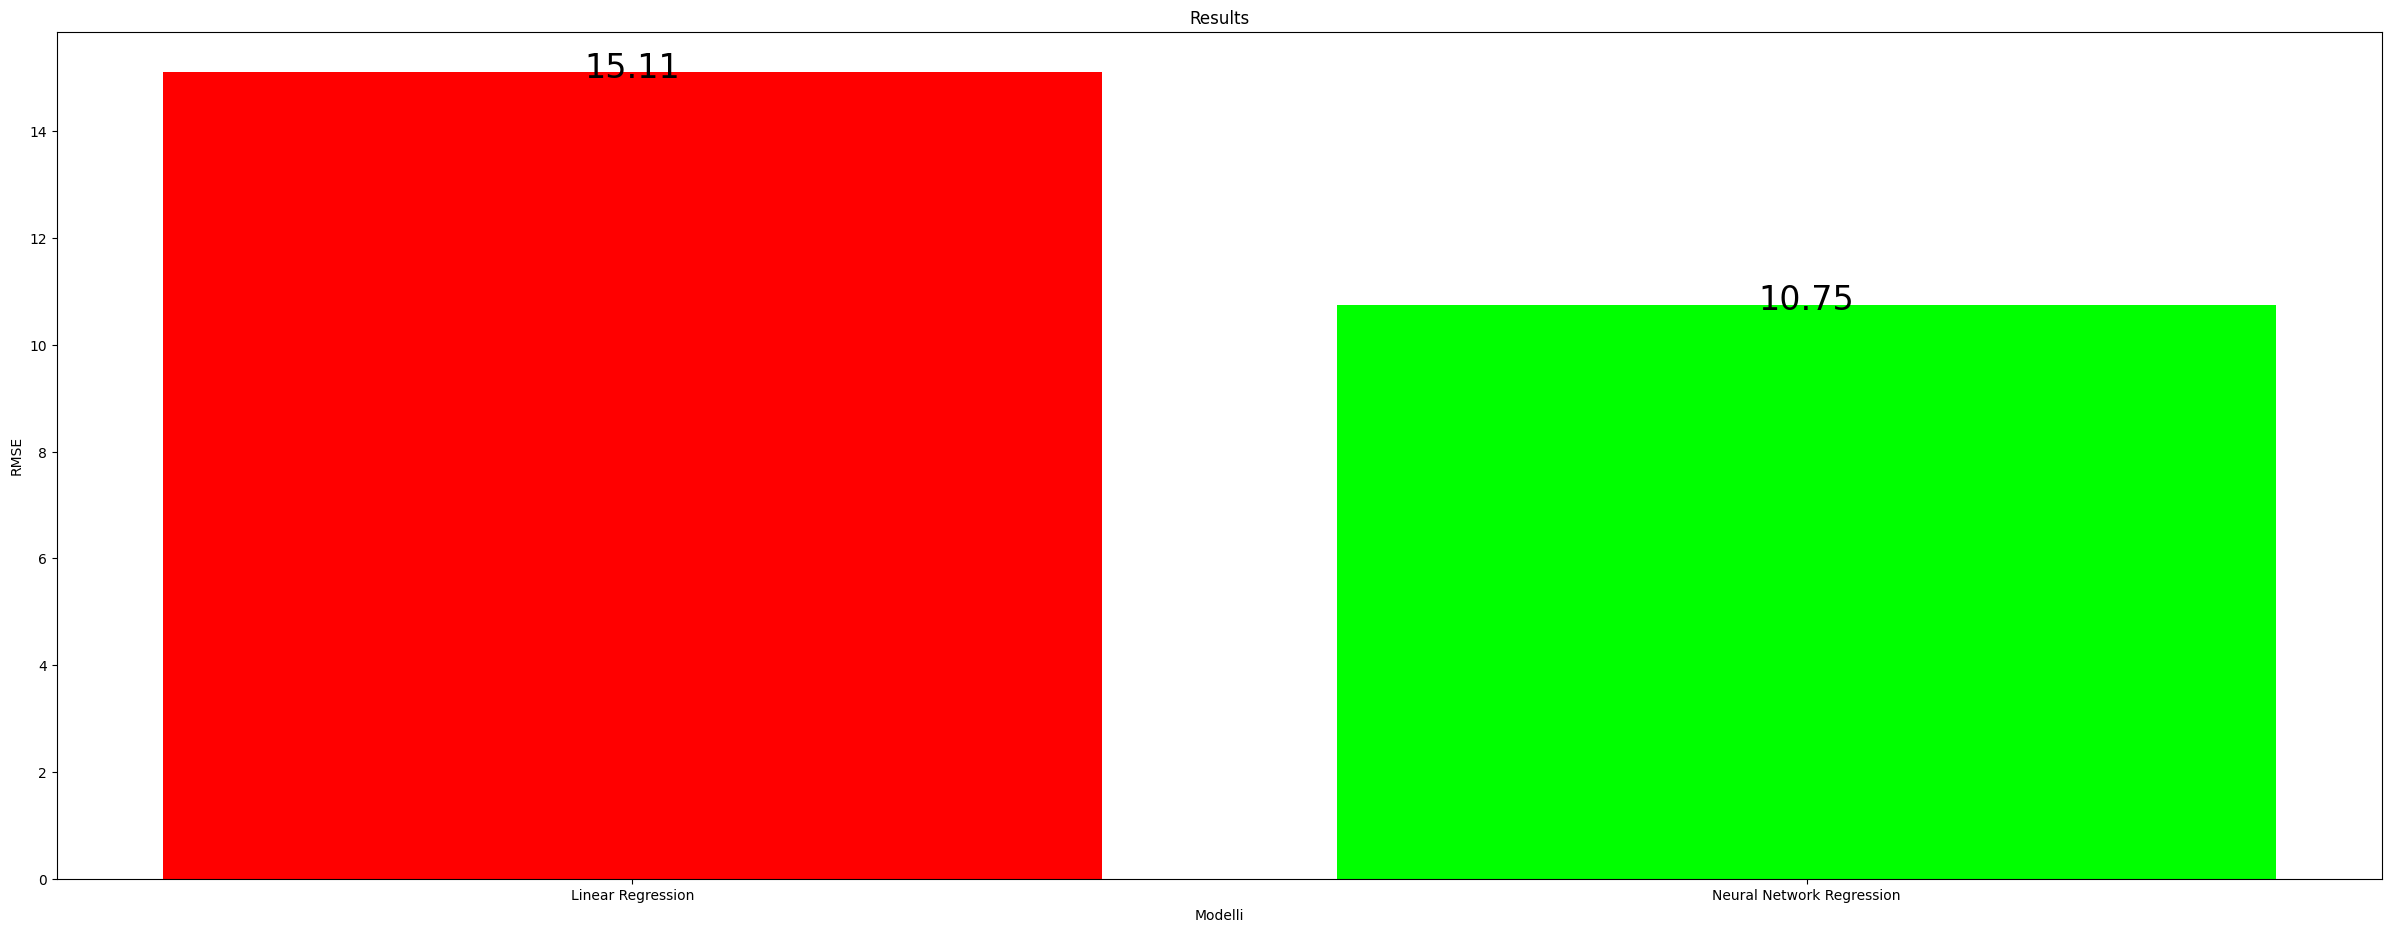

In [ ]:
data=[{'Linear Regression':rmse_linear_regression,
       'Neural Network Regression':min_rmse
       }]
hist_df = pd.DataFrame(data,index=['Root Mean Squared Error'])
plt.figure(figsize=(30,11))
plt.title('Results')
plt.ylabel('RMSE')
plt.xlabel('Modelli')
colors = ['red',  'lime']
plt.bar(hist_df.columns.to_numpy(),hist_df.values[0],color=colors)
for i in range(hist_df.shape[1]):
    rmse=hist_df.values[0][i]
    plt.text(i, rmse-0.1, str(round(rmse,2)), ha='center', fontsize=24)
plt.show()

# Classificazione

Confrontiamo le prestazioni dei modelli di classificazione, utilizzando come metrica l'Accuratezza.

Un analisi dei risultati ottenuti, mostra che gli alberi di decisione e KNN presentano la più alta accuratezza con la differenza che i primi la raggiungono con tempi maggiori di addestramento e KNN con tempi maggiori di  predizione, specialmente su dataset di grandi dimensioni.


La regressione logistica pur ottenendo una percentuale di accuratezza più bassa potrebbe essere considerata una buona opzione, qualora la differenza nell'accuratezza rispetto agli altri modelli non sia significativa, visto che risulta computazionalmente efficiente, veloce da addestrare e predire, in special modo su grandi dataset.




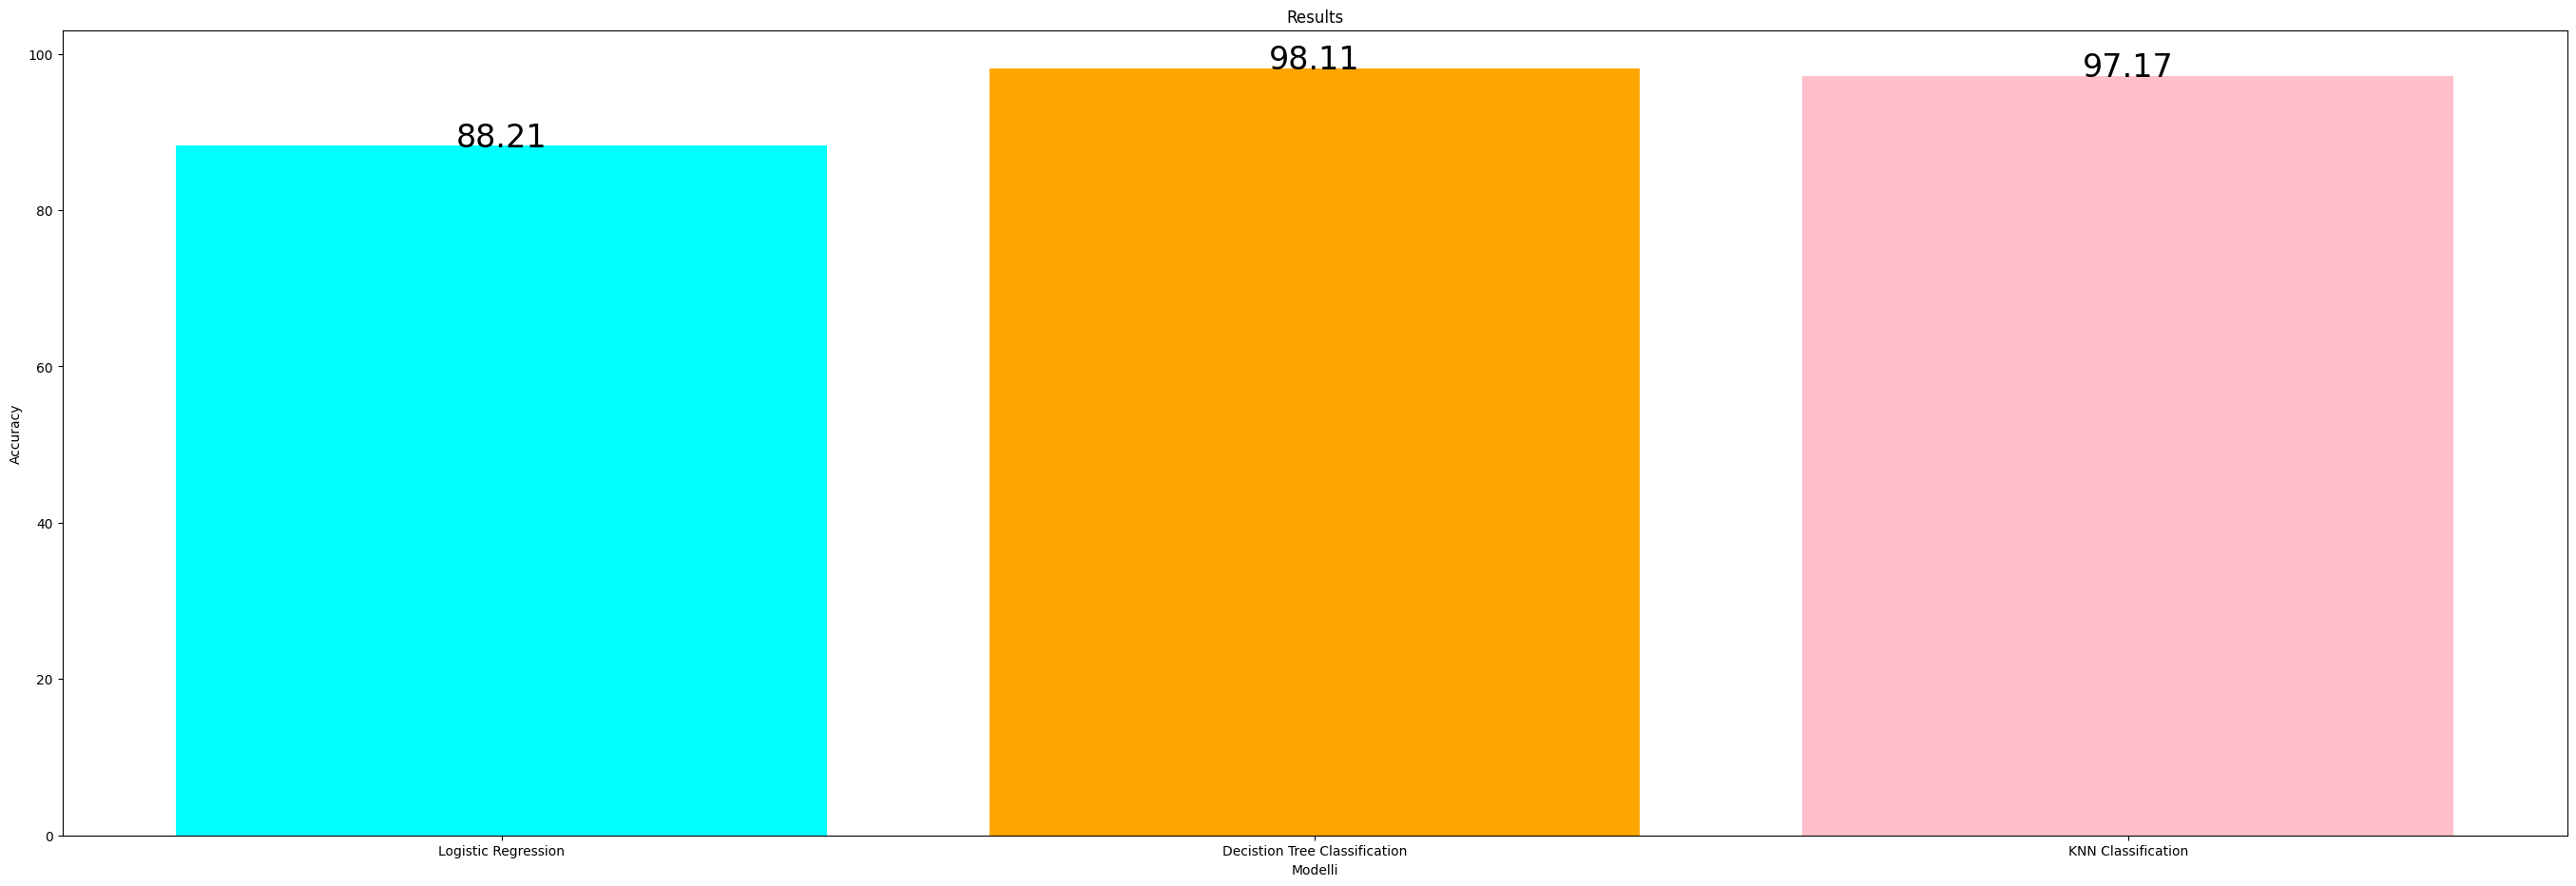

In [ ]:
data=[{
       'Logistic Regression':acc_log_reg*100, \
       'Decistion Tree Classification':acc_dt*100, \
       'KNN Classification':acc_knn*100, \
       }]
hist_df = pd.DataFrame(data,index=['Accuracy'])
plt.figure(figsize=(34,11))
plt.title('Results')
plt.ylabel('Accuracy')
plt.xlabel('Modelli')
colors = [ 'cyan','orange', 'pink',]
plt.bar(hist_df.columns.to_numpy(),hist_df.values[0],color=colors)
for i in range(hist_df.shape[1]):
    rmse=hist_df.values[0][i]
    plt.text(i, rmse-0.1, str(round(rmse,2)), ha='center', fontsize=24)
plt.show()